In [44]:
import pandas as pd
from datetime import timedelta
import numpy as np

from matplotlib import cm
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

In [45]:
data = pd.read_csv('bedoccupancy.csv',
                   parse_dates=['ADMISSION_DATE_TIME', 'DISCHARGE_DATE_TIME'])

In [46]:
data

,StudyID,Resident_Service.NAME,ADMISSION_DATE_TIME,DISCHARGE_DATE_TIME
0,458495,Internal Medicine B,2014-04-01 02:15:00,2014-04-03 16:30:00
1,1212197,Internal Medicine D,2014-04-01 04:21:00,2014-04-17 22:37:00
2,507244,Internal Medicine D,2014-04-01 04:30:00,2014-04-03 17:05:00
3,202030,Internal Medicine E,2014-04-01 04:30:00,2014-04-04 17:12:00
4,460987,Internal Medicine C,2014-04-01 07:50:00,2014-04-08 19:15:00
...,...,...,...,...
24280,266631,Internal Medicine D,2019-03-31 13:43:00,2019-04-03 16:53:00
24281,13479,Internal Medicine D,2019-03-31 16:26:00,2019-04-01 21:20:00
24282,1410780,Internal Medicine D,2019-03-31 18:20:00,2019-04-03 18:17:00
24283,839686,Internal Medicine B,2019-03-31 19:23:00,2019-04-04 18:42:00


## Length of Stay

In [47]:
data['BED_TIME'] = data['DISCHARGE_DATE_TIME']-data['ADMISSION_DATE_TIME']
data['BED_TIME'] = data['BED_TIME']/np.timedelta64(1,'h')

In [48]:
data.head()

,StudyID,Resident_Service.NAME,ADMISSION_DATE_TIME,DISCHARGE_DATE_TIME,BED_TIME
0,458495,Internal Medicine B,2014-04-01 02:15:00,2014-04-03 16:30:00,62.250000
1,1212197,Internal Medicine D,2014-04-01 04:21:00,2014-04-17 22:37:00,402.266667
2,507244,Internal Medicine D,2014-04-01 04:30:00,2014-04-03 17:05:00,60.583333
3,202030,Internal Medicine E,2014-04-01 04:30:00,2014-04-04 17:12:00,84.700000
4,460987,Internal Medicine C,2014-04-01 07:50:00,2014-04-08 19:15:00,179.416667


In [49]:
data['INDEX_ADMISSION'] = pd.to_datetime(data['ADMISSION_DATE_TIME'])
data = data.set_index('INDEX_ADMISSION')
data.head()

,StudyID,Resident_Service.NAME,ADMISSION_DATE_TIME,DISCHARGE_DATE_TIME,BED_TIME
INDEX_ADMISSION,,,,,
2014-04-01 02:15:00,458495,Internal Medicine B,2014-04-01 02:15:00,2014-04-03 16:30:00,62.250000
2014-04-01 04:21:00,1212197,Internal Medicine D,2014-04-01 04:21:00,2014-04-17 22:37:00,402.266667
2014-04-01 04:30:00,507244,Internal Medicine D,2014-04-01 04:30:00,2014-04-03 17:05:00,60.583333
2014-04-01 04:30:00,202030,Internal Medicine E,2014-04-01 04:30:00,2014-04-04 17:12:00,84.700000
2014-04-01 07:50:00,460987,Internal Medicine C,2014-04-01 07:50:00,2014-04-08 19:15:00,179.416667


In [50]:
bed_time = data['BED_TIME'].values
mean_bt = np.median(bed_time)

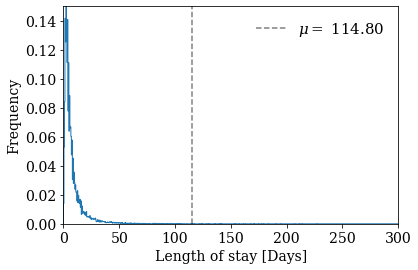

In [51]:
plt.hist(bed_time/24, 'fd', histtype='step', density=1)
plt.plot([mean_bt, mean_bt], [0,0.15], ls='--', color='k', alpha=0.5,
        label=r'$\mu=$ %.2f'%mean_bt)
plt.xlabel('Length of stay [Days]', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.ylim([0,0.15])
plt.xlim([0,300])
plt.legend(loc='best', frameon=0, fontsize=15)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()

## Number of admissions per day

In [80]:
per_day = data.groupby(pd.Grouper(key='ADMISSION_DATE_TIME', freq='1440min')).count()
per_day = per_day.drop(columns=['Resident_Service.NAME', 'DISCHARGE_DATE_TIME', 'BED_TIME'])
per_day = per_day.rename(columns={'StudyID':'Admissions'})

#aux = data.groupby(pd.Grouper(key='DISCHARGE_DATE_TIME', freq='1440min')).count()
#aux = aux['StudyID'].values
#per_day['Discharges'] = aux

per_day

,Admissions
ADMISSION_DATE_TIME,
2014-04-01,13
2014-04-02,16
2014-04-03,12
2014-04-04,11
2014-04-05,12
...,...
2019-03-27,15
2019-03-28,17
2019-03-29,16


In [81]:
aux_values = per_day['Admissions'].values
ft = np.fft.rfft(aux_values)

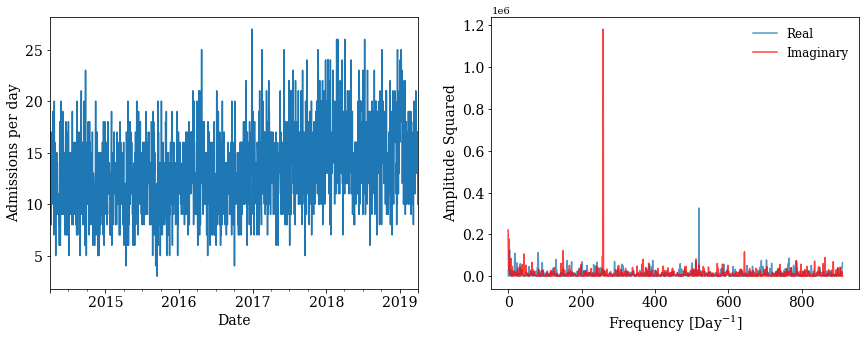

In [82]:
plt.figure(figsize=(14.5,5))
plt.subplot(1,2,1)
per_day['Admissions'].plot()
plt.xlabel('Date', fontsize=14)
plt.ylabel('Admissions per day', fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.subplot(1,2,2)
plt.plot(np.real(ft[2:])**2, alpha = 0.75, label='Real')
plt.plot(np.imag(ft[2:])**2, color='red', alpha=0.75, label='Imaginary')
plt.xlabel('Frequency [Day$^{-1}$]', fontsize=14)
plt.ylabel('Amplitude Squared', fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
#plt.xscale('log')
#plt.yscale('log')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.legend(loc='best', fontsize=12, frameon=0)

plt.show()

## Admissions per day per year

In [83]:
cmap = cm.RdPu

In [84]:
start_year = ['2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01']
end_year= ['2014-12', '2015-12', '2016-12', '2017-12', '2018-12', '2019-12']

colors = np.linspace(0.5,1, len(start_year))

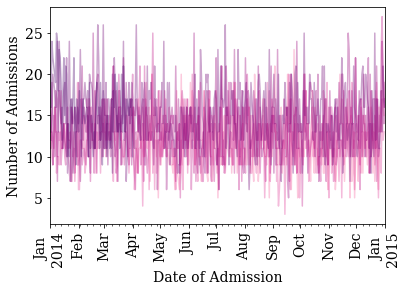

In [85]:
i=0
for start, end, c in zip(start_year, end_year, colors):
    aux = per_day.loc[start:end]
    aux.index = aux.index-pd.offsets.Day(i*365)
    aux['Admissions'].plot(color=cmap(c), alpha = 0.35)
    i = i+1

plt.xlabel('Date of Admission', fontsize=14)
plt.ylabel('Number of Admissions', fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=90)
plt.show()

## Admissions per month per year

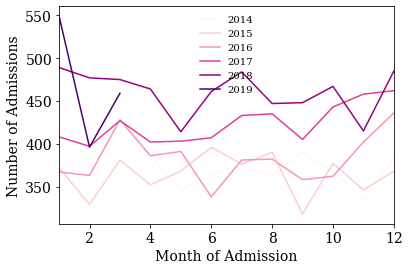

In [53]:
pv = pd.pivot_table(per_day, index=per_day.index.month, columns=per_day.index.year,
                    values='StudyID', aggfunc='sum')
pv.plot(colormap='RdPu')
plt.xlabel('Month of Admission', fontsize=14)
plt.ylabel('Number of Admissions', fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.legend(loc='best', frameon=0)
plt.show()

## Autocorrelation

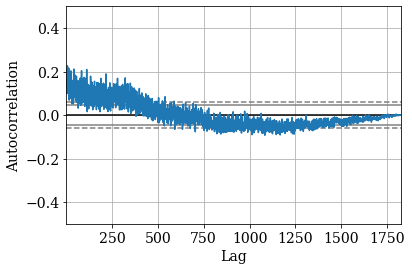

In [45]:
pd.plotting.autocorrelation_plot(per_day['StudyID'])

plt.xlabel('Lag', fontsize=14)
plt.ylabel('Autocorrelation', fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylim([-0.5,0.5])
#plt.xscale('log')
plt.show()

In [76]:
sections = list(set(data['Resident_Service.NAME'].values))
#section = sections[0]

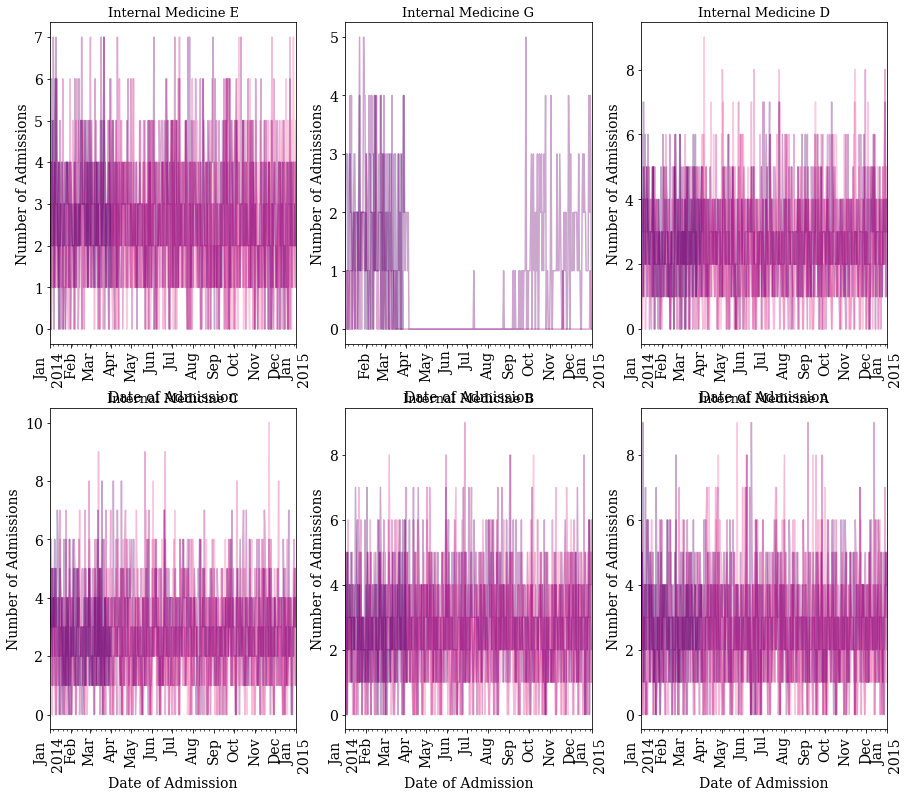

In [105]:
j=1
plt.figure(figsize=(15,13))
for section in sections:
    section_data = data[data['Resident_Service.NAME']==section]
    per_day_per_section = section_data.groupby(pd.Grouper(
        key='ADMISSION_DATE_TIME', freq='1440min')).count()

    i=0
    plt.subplot(2,3,j)
    for start, end, c in zip(start_year, end_year, colors):
        aux = per_day_per_section.loc[start:end]
        aux.index = aux.index-pd.offsets.Day(i*365)
        if len(aux['StudyID'].values)>0:
            aux['StudyID'].plot(color=cmap(c), alpha = 0.35)
        i = i+1

    plt.xlabel('Date of Admission', fontsize=14)
    plt.ylabel('Number of Admissions', fontsize=14)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14, rotation=90)
    plt.title(section, fontsize=13)
    j = j+1
    
plt.show()

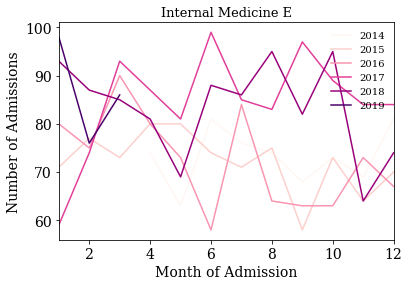

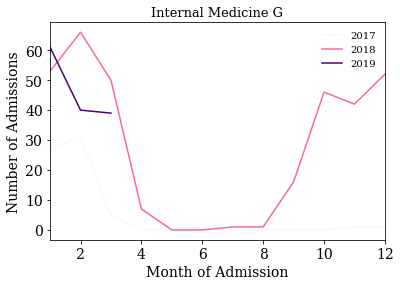

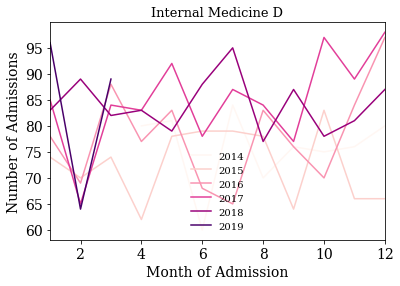

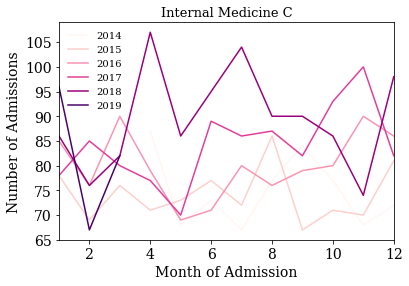

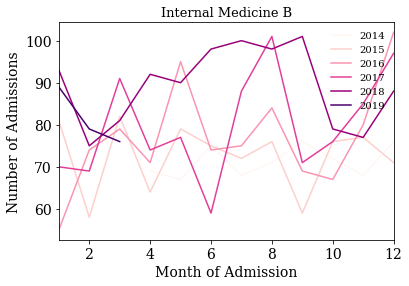

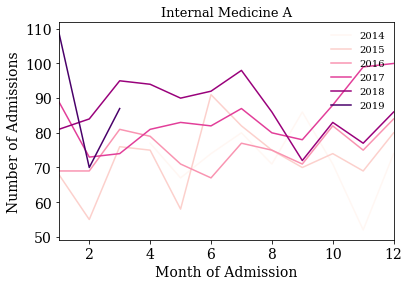

In [112]:
j=1
#plt.figure(figsize=(15,13))
for section in sections:
    section_data = data[data['Resident_Service.NAME']==section]
    per_day_per_section = section_data.groupby(pd.Grouper(
        key='ADMISSION_DATE_TIME', freq='1440min')).count()
    
    #plt.subplot(2,3,j)
    pv = pd.pivot_table(per_day_per_section, 
                        index=per_day_per_section.index.month, 
                        columns=per_day_per_section.index.year,
                        values='StudyID', aggfunc='sum')
    pv.plot(colormap='RdPu')
    plt.xlabel('Month of Admission', fontsize=14)
    plt.ylabel('Number of Admissions', fontsize=14)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.legend(loc='best', frameon=0)
    plt.title(section, fontsize=13)
    j = j+1
    
plt.show()